<a href="https://colab.research.google.com/github/Ganeshwalimbe/Airbnb-Bookings-Analysis/blob/main/Ganesh_Walimbe_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





















































































































## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /EDA/ Airbnb NYC 2019.csv')

In [ ]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#dropping null values 
data.dropna(subset=['name','host_name'],inplace=True)

# selecting only necessary columns from data

In [ ]:
df=data[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **What can we learn about different hosts and areas?**

In [ ]:
host_areas=df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,327
1832,Blueground,Brooklyn,232
1833,Blueground,Manhattan,232
7273,Kara,Manhattan,121
7476,Kazuya,Brooklyn,103


# From above dataframe we can say that the highest number of hostings are in Manhattan created by host Sonder(NYC) and followed by host Blueground

In [ ]:
price_reviews = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_reviews.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


In [ ]:
price=price_reviews['price']
reviews=price_reviews['number_of_reviews']

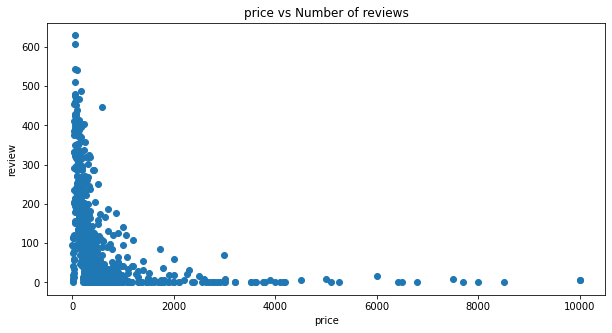

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(price,reviews)
 
plt.xlabel("price")
plt.ylabel("review")
plt.title("price vs Number of reviews")
plt.show()

# From the above Analysis we can say that most people prefer to stay in place where price is less.

# **Which hosts are the busiest and why?**

In [ ]:
busiest_hosts=df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts=busiest_hosts.sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_hosts

,host_id,host_name,room_type,number_of_reviews
24474,47621202,Dona,Private room,629
7706,4734398,Jj,Private room,607
22203,37312959,Maya,Private room,543
4589,2369681,Carol,Private room,540
19436,26432133,Danielle,Private room,510
13704,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5055,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18283,23591164,Angela,Private room,466


In [ ]:
names=busiest_hosts['host_name']
review=busiest_hosts['number_of_reviews']


In [ ]:
fig=plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

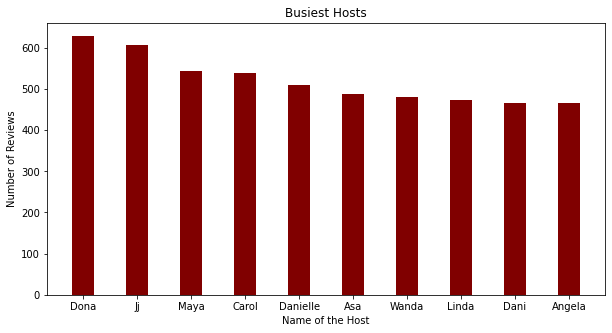

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, review, color ='maroon', width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

# Busiest hosts are : 

1.Dona

2.Ji

3.Maya

4.Carol

5.Danielle

# The above hosts listed their room type as Entire home and Private room which is preferred by most number of people.


# **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13190
4,Brooklyn,Private room,10123
3,Brooklyn,Entire home/apt,9553
7,Manhattan,Private room,7973
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

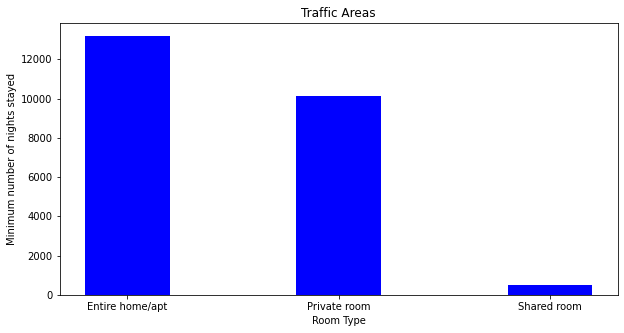

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='blue',width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

# From the Above Analysis We can Say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens .

# **Conclusions:-**

# 1)The people are prefering thoes areas for stay which are having low prices.

# 2) If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

# 3)The highest number of host listings are from Manhattan and are created by Sonder(NYC) and followed by Blueground .

# 4)Busiest hosts are :Dona,Ji,Maya,Carol,Danielle
# beacause theses hosts provides Entire room and private room these room types which are most preferred by people

# 5)People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens

# 6)If people are not staying more then one night means they are travellers.

